# **CHAPTER 04**
# **Training Models**

## **Setting Up**

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **Linear Regression**

### **The Normal Equation**

The mathematical formula that gives the value of theta which minimizes the Mean Square Error (MSE) cost function of a linear regression model is:

$$
\hat{\theta} = (X^T*X)^{-1}*X^T*y
$$

Let's generate a linear dataset.

In [2]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

Saving figure generated_data_plot


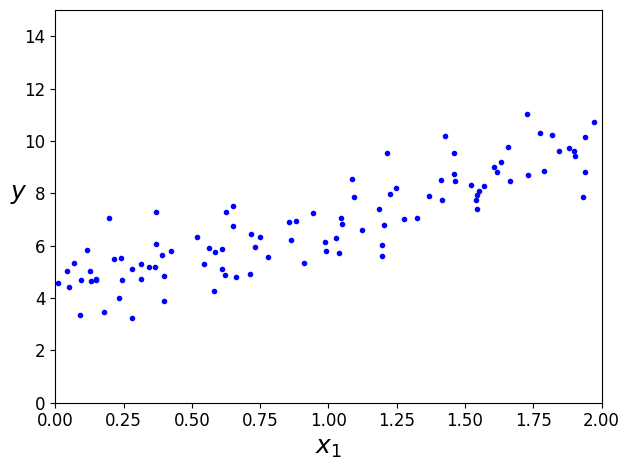

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Let's compute  `theta` using the Normal Equation

In [4]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

Making some predictions using `theta`

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict  = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Let's plot this model

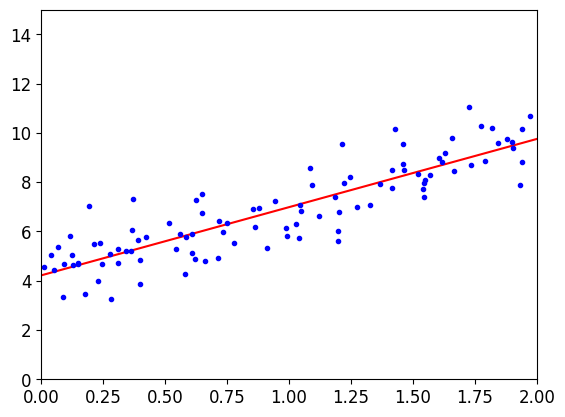

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

Linear Model using Scikit-Learn 

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

`theta` using the Singular Value Decomposition: SVD

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

With the Moore-Penrose inverse

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

### **The Gradient Descent Algorithm**


The Gradient Descent is a optimization method that aims to find the value of theta that minimizes an objective function. \
Here the objective function is the cost function which is the Mean Square Error (MSE). A solution is found when the gradient equals zero.

$$
\theta^{(next \ step)} = \theta^{(current \ step)} -\eta.\nabla_{\theta}MSE(\theta^{(current \ step)})
$$

#### **Batch Gradient Descent**

In [10]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta*gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

In [12]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration <=10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration >0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta- eta * gradients
        if theta_path is not None:
            theta_path.append(theta) 
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


Saving figure gradient_descent_plot


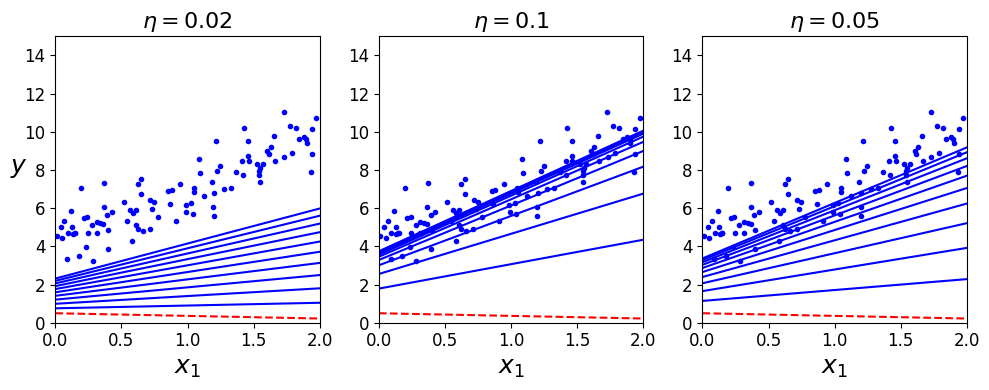

In [14]:
np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization of theta

plt.figure(figsize=(10,4))

plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.05)


save_fig('gradient_descent_plot')
plt.show()


#### **Stochastic Gradient Descent**

### Simulated annealing 
Is the technique of chosing a large learning rate a the beginning of the optimization process.\
And reduce its value progressively through the process. In order to avoid to get stuck in a local minimum.

In [15]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [16]:
# shown in the book
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m +i )
        theta = theta -eta*gradients

In [17]:
theta

array([[4.21076011],
       [2.74856079]])

Saving figure sgd_plot


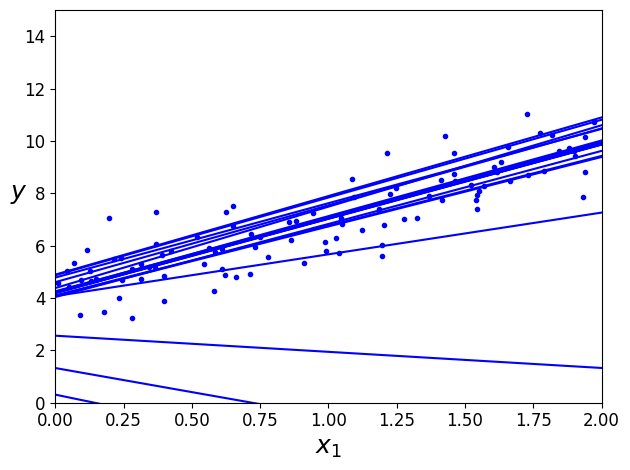

In [18]:
# shown in the author notebook
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration >0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m +i )
        theta = theta -eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])                              
save_fig("sgd_plot")                                 
plt.show()


In [19]:
theta

array([[4.18545376],
       [2.77900595]])

### Stochasatic Gradient Descent Regressor

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))


#### **Mini-batch Gradient Descent**

Instead of using a single instance, or the full batch, a mini-batch is used a each step to update the value of theta.

In [22]:

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(t)
        theta = theta -eta*gradients
        theta_path_mgd.append(theta)


In [23]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [25]:
theta_path_sgd.shape

(5000, 2, 1)

Saving figure gradient_descent_paths_plot


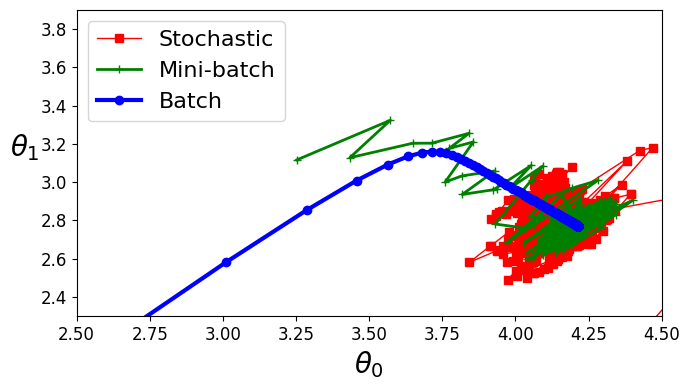

In [26]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

### **Polynomial Regression**

Let's generate some nonlinear data based on a quadratic equation.

In [27]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


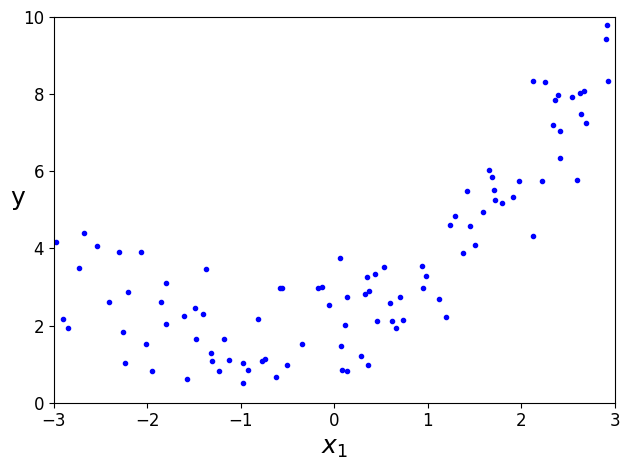

In [28]:
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0,fontsize=18)
save_fig("quadratic_data_plot")
plt.show()

Using the Scikit-Learn class `PolynomialFeatures` to add the square degree.

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [30]:
X[0]

array([2.38942838])

In [31]:
X_poly[0]

array([2.38942838, 5.709368  ])

Now, let's fit a `LinearRegression` model with `X_poly`.

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

Saving figure quadratic_predictions_plot


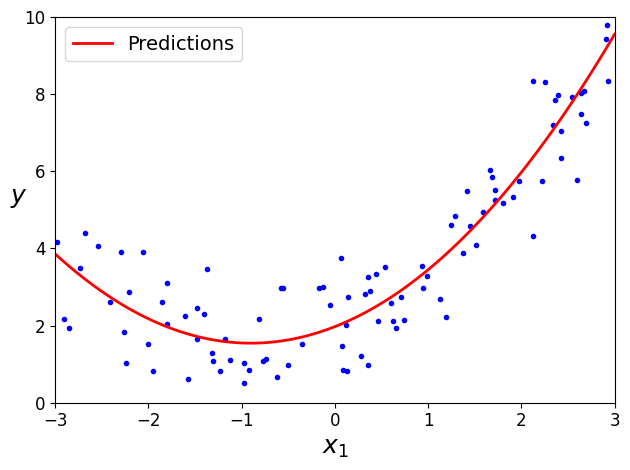

In [33]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Polynomial Regression model using `PolynomialFeatures`

Saving figure high_degree_polynomials_plot


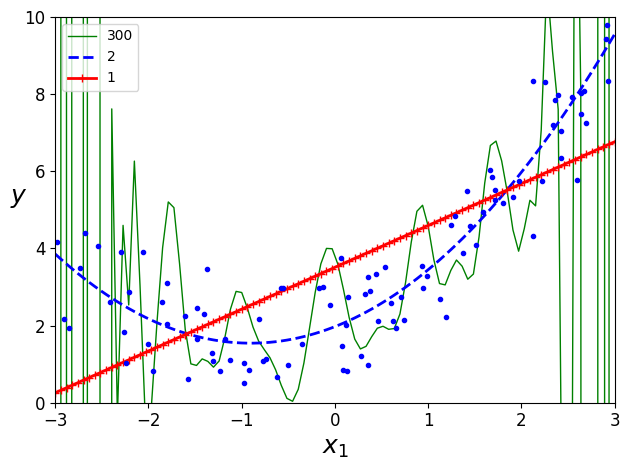

In [34]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

### **Learning Curves**

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y, shuffled=False):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)+1):
        if shuffled:
            shuffled_indices = np.random.permutation(len(X_train))
            model.fit(X_train[shuffled_indices][:m], y_train[shuffled_indices][:m])
            y_train_predict = model.predict(X_train[shuffled_indices][:m])
            y_val_predict = model.predict(X_val)
            train_error =  mean_squared_error(y_train[shuffled_indices][:m], y_train_predict)
            val_error = mean_squared_error(y_val, y_val_predict)
        else:
            model.fit(X_train[:m], y_train[:m])
            y_train_predict = model.predict(X_train[:m])
            y_val_predict = model.predict(X_val)
            train_error =  mean_squared_error(y_train[:m], y_train_predict)
            val_error = mean_squared_error(y_val, y_val_predict)        
   
        train_errors.append(train_error)
        val_errors.append(val_error)

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)    


Saving figure underfitting_learning_curves_plot


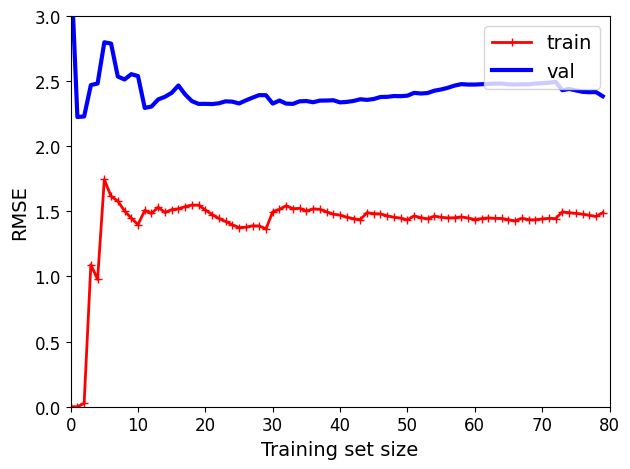

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0 ,3])
save_fig('underfitting_learning_curves_plot')
plt.show()

Saving figure underfitting_learning_curves_plot


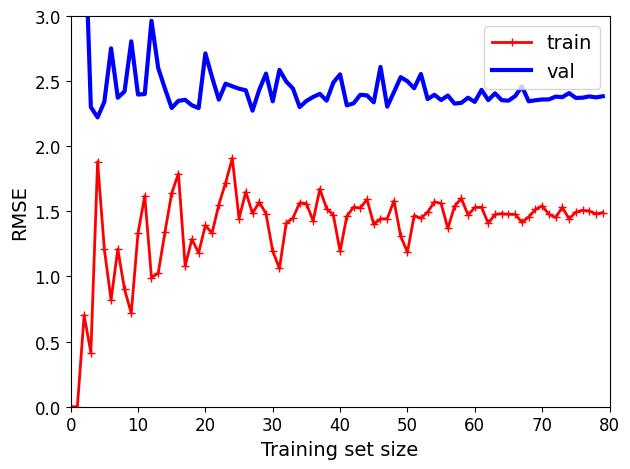

In [37]:
# Shuffling the training data at each iteration
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y, True)
plt.axis([0, 80, 0 ,3])
save_fig('underfitting_learning_curves_plot')
plt.show()

Saving figure learning_curves_plot


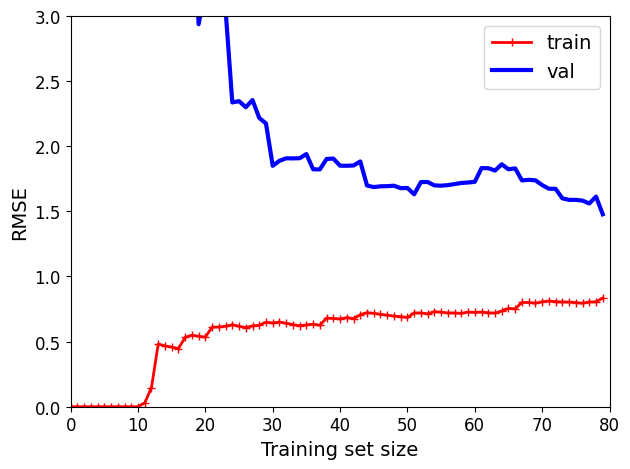

In [38]:

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot")  
plt.show()                        

Saving figure learning_curves_plot


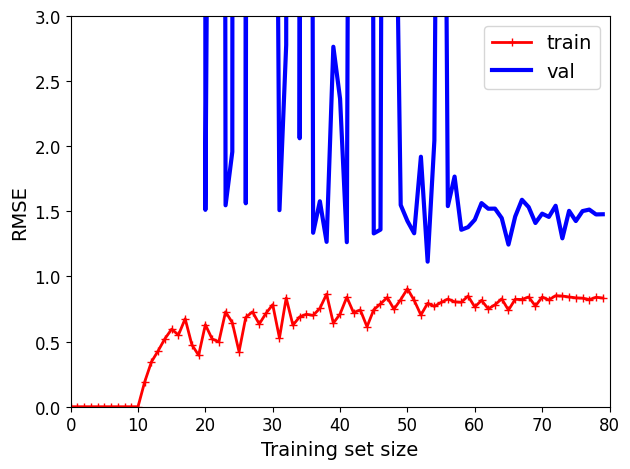

In [39]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y,True)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot")  
plt.show()                        

### **Regularized Linear Models**

#### **Ridge Regression**

The Ridge Regression cost function is:

$$
J(\theta) = MSE(\theta)  + \alpha \frac{1}{2}\sum_{i=1}^{n}\theta_i^2
$$

In [40]:
np.random.seed(42)
m = 20
X = 3*np.random.rand(m,1)
y = 1 + 0.5*X + np.random.randn(m,1)/1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [41]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [42]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

Saving figure ridge_regression_plot


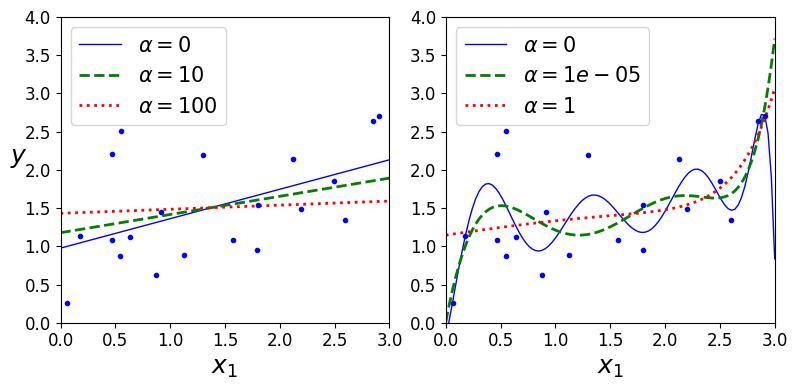

In [43]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

In [44]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

### **Lasso Regression**

The Lasso Regression cost function is:

$$
J(\theta) = MSE(\theta)  + \alpha \frac{1}{2}\sum_{i=1}^{n}{\lvert \theta_i \rvert}
$$

/home/dfg/dev/handson-ml2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


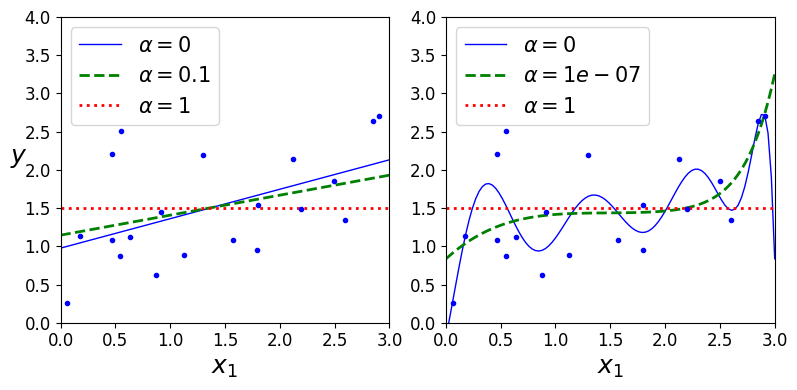

In [45]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [46]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### **Elastic Net**

The Elastic Net cost function is:

$$
J(\theta) = MSE(\theta)  + r\alpha \sum_{i=1}^{n}{\lvert \theta_i \rvert} + \frac{1-r}{2}\alpha \sum_{i=1}^{n}\theta_i^2
$$

In [47]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

### **Early Stopping**

Stop the optimization as soon as the validation error has reached a minimum.

In [60]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error
    def root_mean_squared_error(labels, predictions):
        return np.sqrt(mean_squared_error(labels, predictions))

In [91]:
root_mean_squared_error([5], [1])

np.float64(4.0)

Saving figure early_stopping_plot


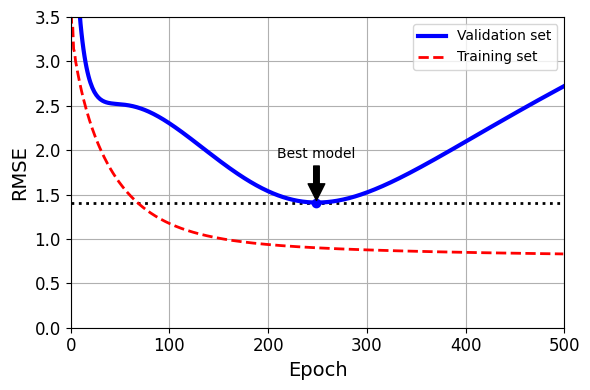

In [104]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1) - 3
y = 2 + X + 0.5*X**2 + np.random.randn(m,1)

X_train, y_train = X[: m // 2], y[:m // 2,0]
X_valid, y_valid = X[m // 2:], y[m // 2:,0]

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler()
)

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)

n_epochs = 500
best_valid_rmse = float('inf')
#best_epoch = -1
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)

    if val_error < best_valid_rmse:
        #best_epoch = epoch
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
    
    # evaluating the train error for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error  = root_mean_squared_error(y_train, y_train_predict)

    train_errors.append(train_error)
    val_errors.append(val_error)

# generate and save the figure
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6,4))
plt.annotate('Best model',
                xy = (best_epoch, best_valid_rmse),
                xytext= (best_epoch, best_valid_rmse + 0.5),
                ha = "center",
                arrowprops = dict(facecolor='black', shrink=0.05)                 
                )
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(list(range(n_epochs)), val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(list(range(n_epochs)), train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()
                    

### **Logistic Regression**